In [43]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
# datasets = ['fungi', 'mscoco', 'wikiart_artist']
dataset = 'wikiart_artist'
# targets = ['full', 'bias', 'qkv_bias', 'even_qkv_bias', 'q_bias', 'even_q_bias']
targets = ['fe', 'fe_bias', 'fe_qkv_bias', 'fe_even_qkv_bias']

In [45]:
def plot_loss_per_lr(dataset):
    plt.figure(figsize=(14, 500))

    for i, target in enumerate(targets):
        src_path = f"outputs/ft_trajs_{target}_train_lr_searching"
        path = os.path.join(src_path, dataset)
        file_names = sorted(list(filter(lambda fn: 'loss' in fn, os.listdir(path))))

        for k, file_name in enumerate(file_names):
            datas = np.load(os.path.join(path, file_name))
            datas = datas.squeeze(0)
            for j in range(datas.shape[0]):
                plt.subplot(16*8,5,40*i+5*k+j+1)
                plt.xlim(-1, 20)
                # plt.ylim(0, 0.5)
                plt.title(f"{target}_{file_name}_{j}")
                data = datas[j]
                x = np.arange(0, 20)
                plt.plot(x, data)
    plt.show()
    

In [52]:
def plot_loss(dataset):
    plt.figure(figsize=(14, len(targets)*3))
    for i, target in enumerate(targets):
        src_path = f"outputs/ft_trajs_{target}_train_lr_searching"
        path = os.path.join(src_path, dataset)
        file_names = sorted(list(filter(lambda fn: 'loss' in fn, os.listdir(path))))
        plt.subplot(len(targets)//2,2,i+1)
        plt.ylim(0, 0.6)
        plt.title(target)
        for file_name in file_names:
            datas = np.load(os.path.join(path, file_name))
            datas = datas.squeeze(0)
            datas = datas.sum(axis=0) / datas.shape[0]
            datas = datas[:30]
            x = np.arange(0, 30)
            plt.plot(x, datas, marker='o', label=file_name)
            plt.legend()

    plt.show()

In [53]:
def plot_acc(dataset):
    plt.figure(figsize=(14, len(targets)*3))
    for i, target in enumerate(targets):
        src_path = f"outputs/ft_trajs_{target}_train_lr_searching"
        path = os.path.join(src_path, dataset)
        file_names = sorted(list(filter(lambda fn: 'acc' in fn, os.listdir(path))))
        plt.subplot(len(targets)//2,2,i+1)
        plt.ylim(75, 100)
        plt.xlim(0, 20)
        plt.title(target)
        for file_name in file_names:
            datas = np.load(os.path.join(path, file_name))
            datas = datas.squeeze(0)
            datas = datas.sum(axis=0) / datas.shape[0]
            datas = datas[:30]
            x = np.arange(0, 30)
            plt.plot(x, datas, label=file_name)
            plt.legend()
    plt.show()

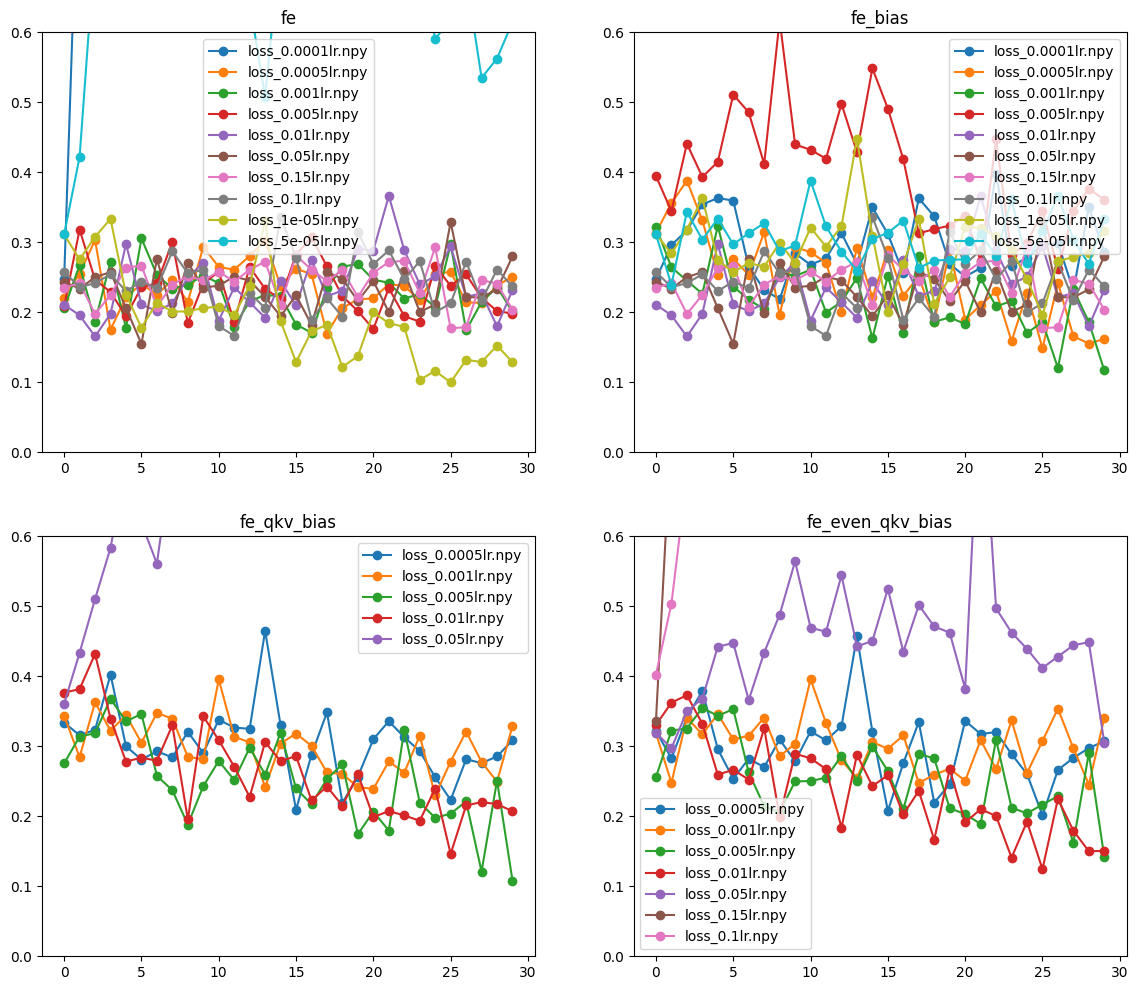

In [54]:
plot_loss(dataset)

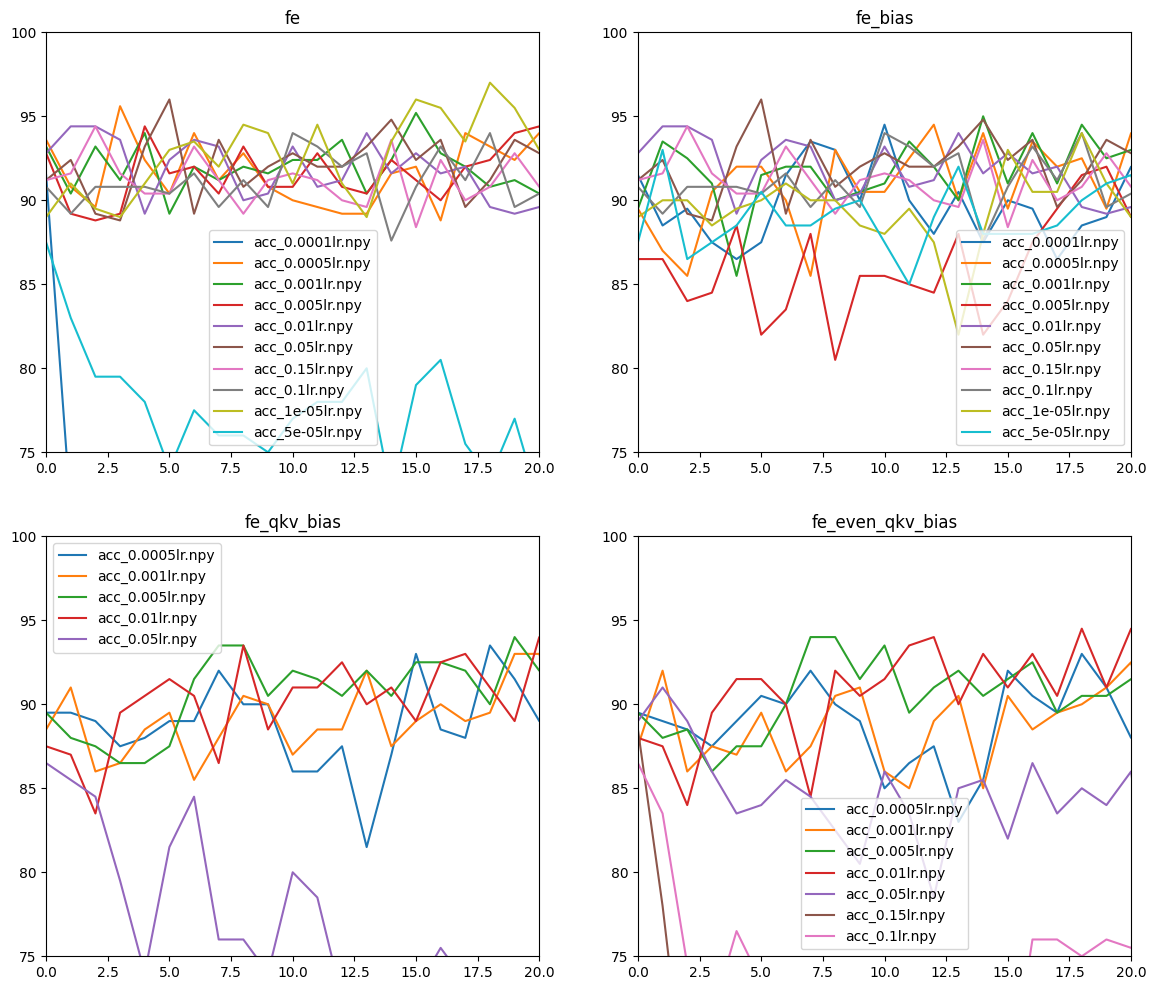

In [55]:
plot_acc(dataset)